In [124]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
#Upload the faces for the program to be familiar with

!mkdir known
!wget https://media.cnn.com/api/v1/images/stellar/prod/221031212322-donald-trump.jpg?c=original -O known/Trump.jpg
!wget https://static-koimoi.akamaized.net/wp-content/new-galleries/2022/02/kanye-west-makes-1-35-million-in-just-12-hours-after-making-donda-2-available-only-on-his-music-device-001.jpg -O known/Kanye.jpg
!wget https://image.cnbcfm.com/api/v1/image/106878527-1620223837055-106748412-1602881184740-biden.jpg?v=1620224062 -O known/Biden.jpg

mkdir: cannot create directory ‘known’: File exists
--2023-02-04 19:10:04--  https://media.cnn.com/api/v1/images/stellar/prod/221031212322-donald-trump.jpg?c=original
Resolving media.cnn.com (media.cnn.com)... 151.101.3.5, 151.101.67.5, 151.101.131.5, ...
Connecting to media.cnn.com (media.cnn.com)|151.101.3.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1150515 (1.1M) [image/jpeg]
Saving to: ‘known/Trump.jpg’

known/Trump.jpg     100%[===================>]   1.10M  --.-KB/s    in 0.02s   

2023-02-04 19:10:04 (59.3 MB/s) - ‘known/Trump.jpg’ saved [1150515/1150515]

--2023-02-04 19:10:04--  https://static-koimoi.akamaized.net/wp-content/new-galleries/2022/02/kanye-west-makes-1-35-million-in-just-12-hours-after-making-donda-2-available-only-on-his-music-device-001.jpg
Resolving static-koimoi.akamaized.net (static-koimoi.akamaized.net)... 95.101.78.83, 95.101.78.96, 2a02:26f0:9100:16::6011:ced4, ...
Connecting to static-koimoi.akamaized.net (static-koimoi.aka

In [126]:
!mkdir unknown
!wget https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iD1F6NnUGxDs/v1/1200x-1.jpg -O unknown/1.jpg
!wget https://media.gq.com/photos/5ad93798ceb93861adb912d8/4:3/w_2683,h_2012,c_limit/kanye-west-0814-GQ-FEKW01.01.jpg -O unknown/2.jpg
!wget https://www.washingtonpost.com/rf/image_1484w/2010-2019/WashingtonPost/2016/07/17/National-Politics/Images/AP_Poll_Campaign_2016-Issues-3012f.jpg?t=20170517 -O unknown/3.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Dwayne_Johnson_2014_%28cropped%29.jpg/640px-Dwayne_Johnson_2014_%28cropped%29.jpg -O unknown/4.jpg

mkdir: cannot create directory ‘unknown’: File exists
--2023-02-04 19:10:04--  https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iD1F6NnUGxDs/v1/1200x-1.jpg
Resolving assets.bwbx.io (assets.bwbx.io)... 151.101.1.73, 151.101.65.73, 151.101.129.73, ...
Connecting to assets.bwbx.io (assets.bwbx.io)|151.101.1.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109480 (107K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>] 106.91K  --.-KB/s    in 0.007s  

2023-02-04 19:10:04 (14.4 MB/s) - ‘unknown/1.jpg’ saved [109480/109480]

--2023-02-04 19:10:04--  https://media.gq.com/photos/5ad93798ceb93861adb912d8/4:3/w_2683,h_2012,c_limit/kanye-west-0814-GQ-FEKW01.01.jpg
Resolving media.gq.com (media.gq.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.gq.com (media.gq.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 800532 (782K) [image/jpeg]
Saving to: ‘unknown/2

In [127]:
#Import Libraries
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [128]:
#Resize images so they are all the same size
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h*ratio)
  return cv2.resize(img,(width, height)) 

In [129]:
#Create Known Photo's Specific Data
known_encodings = []
known_names = []
known_dir = 'known'
unknown_dir = 'unknown'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])


known_encodings

[array([-0.03277086,  0.1794491 ,  0.05112142,  0.0403497 , -0.13187546,
         0.05477971, -0.06503581, -0.08673386,  0.09799496, -0.06467462,
         0.20074296, -0.03735647, -0.25895613,  0.02748615,  0.02509746,
         0.15499848, -0.13144098, -0.06799852, -0.18170777, -0.07819953,
         0.02401029,  0.00843423,  0.08794013, -0.02032331, -0.18661538,
        -0.24786936, -0.02943663, -0.13796307, -0.04821236, -0.14084096,
         0.0395101 , -0.07365292, -0.21743783, -0.05384374, -0.0405453 ,
        -0.01430872, -0.07607413, -0.08834364,  0.18504713, -0.03353633,
        -0.1500255 ,  0.07809068,  0.01600968,  0.18751955,  0.19855651,
         0.00310618,  0.04577635, -0.05572708,  0.12832533, -0.20466569,
         0.00261074,  0.06036725,  0.17647605,  0.08467643,  0.06297997,
        -0.06943695,  0.0327502 ,  0.21599674, -0.15793355,  0.09396584,
         0.03666934, -0.04699704,  0.04641321, -0.03267454,  0.22641163,
         0.10702528, -0.04690824, -0.10957239,  0.1

Processing 4.jpg
[False, False, False]
Processing 3.jpg


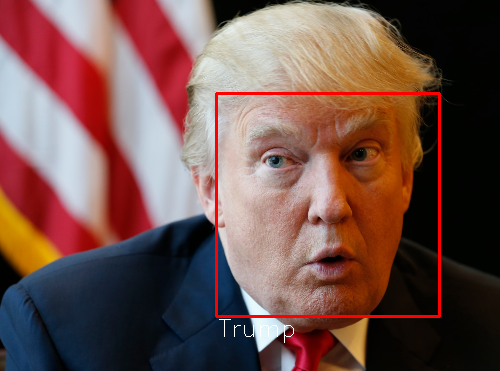

[False, True, False]
Processing 2.jpg


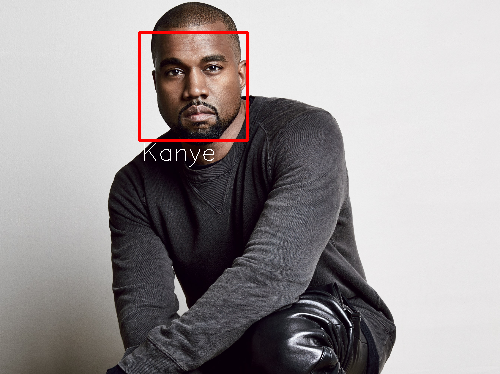

[False, False, True]
Processing 1.jpg


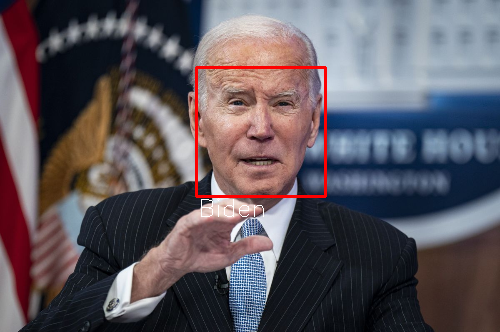

[True, False, False]


In [130]:
#Create Unknown Photo's Specific Data
for file in os.listdir(unknown_dir):
  print("Processing", file )
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  #List the Results
  results = face_recognition.compare_faces(known_encodings, img_enc)
  
  #Add known Name to The Results
  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top,right,bottom,left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img,(left,top),(right,bottom), (0, 0, 255), 2)
      cv2.putText(img, name, (left+2, bottom +20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 1)
      cv2_imshow(img) 


  print(results)  
